## Test correlation of lambda ratios with cos(i)

In [1]:
import numpy as np
import sys
sys.path.append('/home/zzbenjamin94/Desktop/Astronomy/Research/DES_Galaxy_Cluster')

# import pyplot and set some parameters to make plots prettier
import matplotlib.pyplot as plt
from tools.plot_utils import plot_pretty
import pickle
plot_pretty()

# setup notebook for inline figures
%matplotlib inline

from tools.setup.setup import data_home_dir, home_dir, bigdata_home_dir
import astropy.io.fits as fits

datadir = data_home_dir()
homedir = home_dir()
bigdatadir = bigdata_home_dir()

## Import catalogs

### v1.3 of cluster matched halos

In [3]:
from repo.halo_shape.read_shape_param import read_shape_param
import numpy.lib.recfunctions as rfn
import pickle

#filename = homedir +'output/buzzard/halo_shape/halo_shape_redM_matched_v1.2.npy'
#See if using a different filename changes things.
filename = homedir +'output/buzzard/redM_halos_fullmatchingparams_matchingv1.3_Buzzardv1.6.data'
infile = open(filename,'rb')
redM_matched = pickle.load(infile)
redM_matched = redM_matched.view(np.recarray)

print "Number of halos in the redM catalog is ", len(redM_matched)
print redM_matched.dtype

#Apply mass cut
print "Number of cluster matched halos is ", len(redM_matched)

Number of halos in the redM catalog is  13628
(numpy.record, [('GALAXY_ID', '<i8'), ('HALOID', '<i8'), ('DESCID', '>i8'), ('RA_OBS', '>f8'), ('DEC_OBS', '>f8'), ('TRA', '>f8'), ('TDEC', '>f8'), ('Z', '>f8'), ('MVIR', '>f8'), ('VMAX', '>f8'), ('VRMS', '>f8'), ('RVIR', '>f8'), ('RS', '>f8'), ('NP', '>f8'), ('PX', '>f8'), ('PY', '>f8'), ('PZ', '>f8'), ('VX', '>f8'), ('VY', '>f8'), ('VZ', '>f8'), ('JX', '>f8'), ('JY', '>f8'), ('JZ', '>f8'), ('SPIN', '>f8'), ('RS_KLYPIN', '>f8'), ('MVIR_ALL', '>f8'), ('M200B', '>f8'), ('M200C', '>f8'), ('M500C', '>f8'), ('M2500C', '>f8'), ('XOFF', '>f8'), ('VOFF', '>f8'), ('SPIN_BULLOCK', '>f8'), ('B_TO_A', '>f8'), ('C_TO_A', '>f8'), ('PID', '>i8'), ('LUMTOT', '>f8'), ('LUM20', '>f8'), ('LBCG', '>f8'), ('NGALS', '>i8'), ('N18', '>i8'), ('N19', '>i8'), ('N20', '>i8'), ('N21', '>i8'), ('N22', '>i8'), ('matching_ID', '<i8'), ('MEM_MATCH_ID', '<i8'), ('LAMBDA_CHISQ', '<f8'), ('RA_REDM', '<f8'), ('DEC_REDM', '<f8'), ('q', '<f8'), ('s', '<f8'), ('cosi', '<f8'), (

### redMaPPer catalog
matched_memID = np.intersect1d(redM_data['MEM_MATCH_ID'], redM_shape.MEM_MATCH_ID) to match with redM_shape 

In [5]:
#Import the redMaPPer galaxy catalog
homedir = home_dir()
redM_dir = bigdatadir + '/Buzzard_Sims/v1.6/buzzard_halo/redM/'+'buzzard-0_1.6_y3_run_redmapper_v6.4.20_lgt20_vl02_catalog.fit'

redM_list = fits.open(redM_dir)
redM_data = redM_list[1].data
redM_data = redM_data.view(np.recarray)

print "Names of redM_matched halo column data are:"
print redM_data.dtype.names, "\n"
print "Number of redM read is ", len(redM_data)

#Matching to the redM_halos. MEM_MATCH_ID
matched_memID = np.intersect1d(redM_data['MEM_MATCH_ID'], redM_data.MEM_MATCH_ID)
matched_ind = [i for (i,x) in enumerate(redM_data['MEM_MATCH_ID']) if x in matched_memID]
redM_data = redM_data[matched_ind] #filter by matched redM objects
print "Number of redM objects matched to redM_halos are ", len(redM_data)

Names of redM_matched halo column data are:
('MEM_MATCH_ID', 'RA', 'DEC', 'MODEL_MAG', 'MODEL_MAGERR', 'REFMAG', 'REFMAG_ERR', 'ZRED', 'ZRED_E', 'ZRED_CHISQ', 'BCG_SPEC_Z', 'Z_SPEC_INIT', 'Z_INIT', 'Z', 'LAMBDA_CHISQ', 'LAMBDA_CHISQ_E', 'LAMBDA_ZRED', 'LAMBDA_ZRED_E', 'R_LAMBDA', 'SCALEVAL', 'MASKFRAC', 'GEOMASKFRAC', 'C_LAMBDA', 'C_LAMBDA_ERR', 'MAG_LAMBDA_ERR', 'CHISQ', 'Z_LAMBDA', 'Z_LAMBDA_E', 'Z_LAMBDA_NITER', 'EBV_MEAN', 'LNLAMLIKE', 'LNBCGLIKE', 'LNLIKE', 'PZBINS', 'PZ', 'NCROSS', 'RMASK', 'RA_ORIG', 'DEC_ORIG', 'W', 'DLAMBDA_DZ', 'DLAMBDA_DZ2', 'DLAMBDAVAR_DZ', 'DLAMBDAVAR_DZ2', 'LAMBDA_CHISQ_C', 'LAMBDA_CHISQ_CE', 'NCENT', 'NCENT_GOOD', 'RA_CENT', 'DEC_CENT', 'ID_CENT', 'LAMBDA_CHISQ_CENT', 'ZLAMBDA_CENT', 'P_BCG', 'P_CEN', 'Q_CEN', 'P_FG', 'Q_MISS', 'P_SAT', 'P_C', 'BCG_ILUM', 'ILUM', 'Z_LAMBDA_RAW', 'Z_LAMBDA_E_RAW', 'LIM_EXPTIME', 'LIM_LIMMAG_DERED', 'LIM_LIMMAG', 'LIM_LIMMAG_HARD') 

Number of redM read is  24243
Number of redM objects matched to redM_halos are  24243


### redMaPPer member catalog
matched_memID = np.intersect1d(redM_data['MEM_MATCH_ID'], redM_shape.MEM_MATCH_ID) to match with redM_shape 

In [6]:
redM_dir = bigdatadir + 'Buzzard_Sims/v1.6/buzzard_halo/redM/buzzard-0_1.6_y3_run_redmapper_v6.4.20_lgt20_vl02_catalog_members.fit'
redM_list = fits.open(redM_dir)
redM_members = redM_list[1].data

#Checking FITS into
#hrun_list.info()
print "Names of columns in redM_data are: \n"
print redM_members.names

#Converting FITS files into record array
redM_members = redM_members.view(np.recarray)

print "\nBefore matching, number of redMaPPer members is", len(redM_members.ID)

#Match to redM_shape
matched_memID = np.intersect1d(redM_members['MEM_MATCH_ID'], redM_members.MEM_MATCH_ID)
matched_ind = [i for (i,x) in enumerate(redM_members['MEM_MATCH_ID']) if x in matched_memID]
redM_members = redM_members[matched_ind] #filter by matched redM objects
print "Number of redM members matched to redM_shape are ", len(redM_members)

Names of columns in redM_data are: 

['MEM_MATCH_ID', 'Z', 'RA', 'DEC', 'R', 'P', 'PFREE', 'THETA_I', 'THETA_R', 'MODEL_MAG', 'MODEL_MAGERR', 'REFMAG_FIT', 'REFMAG_FIT_E', 'REFMAG', 'REFMAG_ERR', 'ZRED', 'ZRED_E', 'ZRED2', 'ZRED2_E', 'CHISQ', 'EBV', 'ZSPEC', 'ID']

Before matching, number of redMaPPer members is 1564350
Number of redM members matched to redM_shape are  1564350


## Sort catalogs by MEM_MATCH_ID
Speeds up computation. 

In [7]:
#Sort the arrays by order of ID. That way the indices match. 

#For redM_matched
ID_sort = np.argsort(redM_matched.MEM_MATCH_ID)
redM_matched = redM_matched[ID_sort]
print "After sorting, IDs in redM_matched are: "
print redM_matched.MEM_MATCH_ID, "\n"

#For redM
ID_sort = np.argsort(redM_data.MEM_MATCH_ID)
redM_data = redM_data[ID_sort]
print "After sorting, IDs in redM_data are: "
print redM_data.MEM_MATCH_ID, "\n"

#For redM_members
ID_sort = np.argsort(redM_members.MEM_MATCH_ID)
redM_members = redM_members[ID_sort]
print "After sorting, IDs in redM_members are: "
print redM_members.MEM_MATCH_ID, "\n"

After sorting, IDs in redM_matched are: 
[     6     11     12 ... 161805 163173 197265] 

After sorting, IDs in redM_data are: 
[     6     11     12 ... 196961 197265 221475] 

After sorting, IDs in redM_members are: 
[     6      6      6 ... 221475 221475 221475] 



## Extract info
1. P_CEN from redM
2. ID_CENT from redM
3. from ID_CENT get the top two and measure their distance. 

In [8]:
##Cosmology for measuring distance
from astropy import units as u
from astropy import cosmology
from astropy.cosmology import WMAP9 as cosmo
from astropy.coordinates import SkyCoord

In [9]:
## Parameters to extract
lmda_cent = np.array([[0.0]*5 for i in range(len(redM_matched))])
r_sep_cent = np.array([0.0 for i in range(len(redM_matched))])

In [10]:
for i, cur_matched in enumerate(redM_matched):
    #find current redM in redM_data
    cur_redM = redM_data[np.where(redM_data.MEM_MATCH_ID == cur_matched.MEM_MATCH_ID)]
    lmda_ratio_cur = cur_redM.LAMBDA_CHISQ_CENT[0][1]/cur_redM.LAMBDA_CHISQ_CENT[0][0]
    
    if cur_redM.LAMBDA_CHISQ_CENT[0][1] == 0: #if only one central candidate then array becomes 0
        r_sep_cent[i] = -1
    else:
        lmda_cent[i] = cur_redM.LAMBDA_CHISQ_CENT
        
        ###Get distance separation of top two central candiates from redM_member
        #Get matching IDs of redM_members. Speeds things up
        cur_ID = cur_matched.MEM_MATCH_ID
        cur_mem_ind = np.where(redM_members.MEM_MATCH_ID == cur_ID)
        redM_mem_cur = redM_members[cur_mem_ind]
        
        #Get galaxies matching ID_CENT 
        ID_cent_0 = cur_redM.ID_CENT[0][0]; ID_cent_1 = cur_redM.ID_CENT[0][1]
        redM_mem_0 = redM_mem_cur[np.where(redM_mem_cur.ID == ID_cent_0)]
        redM_mem_1 = redM_mem_cur[np.where(redM_mem_cur.ID == ID_cent_1)]
        
        #comoving distance from redshift, assuming both galaxies have same redshift
        redM_mem_comv = cosmo.comoving_distance(redM_mem_0.Z)
        redM_mem_coord_0 = SkyCoord(redM_mem_0.RA*u.deg, redM_mem_0.DEC*u.deg, distance=redM_mem_comv, frame='icrs')
        redM_mem_coord_1 = SkyCoord(redM_mem_1.RA*u.deg, redM_mem_1.DEC*u.deg, distance=redM_mem_comv, frame='icrs')
        r_sep_cur = redM_mem_coord_0.separation_3d(redM_mem_coord_1).value[0] # in Mpc/h
        
        #Input into datavector
        r_sep_cent[i] = r_sep_cur
               
        if i%100 == 0:
            print "For index {:d} separation between galaxies is {:.3f}".format(i, r_sep_cur)    

For index 0 separation between galaxies is 0.819
For index 100 separation between galaxies is 0.332
For index 300 separation between galaxies is 0.256
For index 400 separation between galaxies is 0.115
For index 500 separation between galaxies is 0.151
For index 600 separation between galaxies is 0.181
For index 700 separation between galaxies is 0.613
For index 800 separation between galaxies is 0.304
For index 900 separation between galaxies is 0.136
For index 1000 separation between galaxies is 0.485
For index 1100 separation between galaxies is 0.302
For index 1200 separation between galaxies is 0.579
For index 1300 separation between galaxies is 0.268
For index 1400 separation between galaxies is 0.163
For index 1500 separation between galaxies is 0.186
For index 1600 separation between galaxies is 1.681
For index 1800 separation between galaxies is 1.775
For index 1900 separation between galaxies is 0.327
For index 2000 separation between galaxies is 0.660
For index 2100 separati

## Plot lmda ratio with distance for testing, before storing into rec. array

#### Filter ny valid indices where r_sep != -1

In [10]:
#-1 are ones with no alternative central candidates
valid_ind = np.where(r_sep_cent != -1)

lmda_cent = lmda_cent[valid_ind]
r_sep_cent = r_sep_cent[valid_ind]
redM_matched = redM_matched[valid_ind]

#### $\lambda$ ratio vs. radius

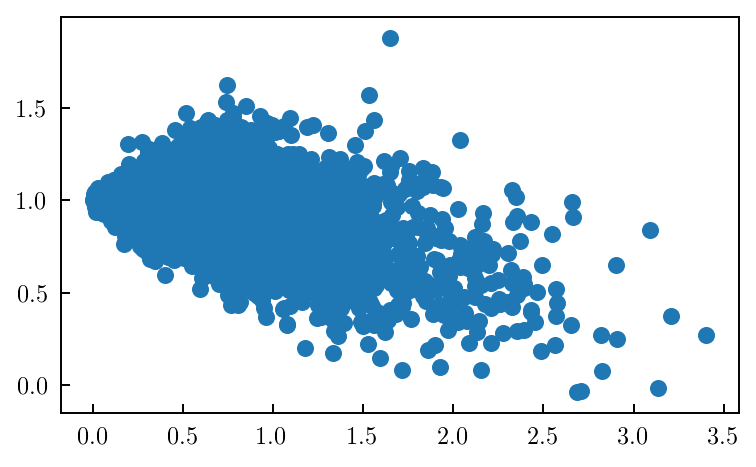

In [11]:
lmda_ratio = lmda_cent[:,1]/lmda_cent[:,0]

plt.figure(figsize=(5,3))
plt.scatter(r_sep_cent, lmda_ratio)
plt.show()

#### $\lambda$ ratio vs. redMaPPer radius

In [12]:
#Convert 3D distance to R_lambda units
h=0.7
r_lambda = (redM_matched.LAMBDA_CHISQ/100)**(0.2)/h
r_ratio = r_sep_cent/r_lambda

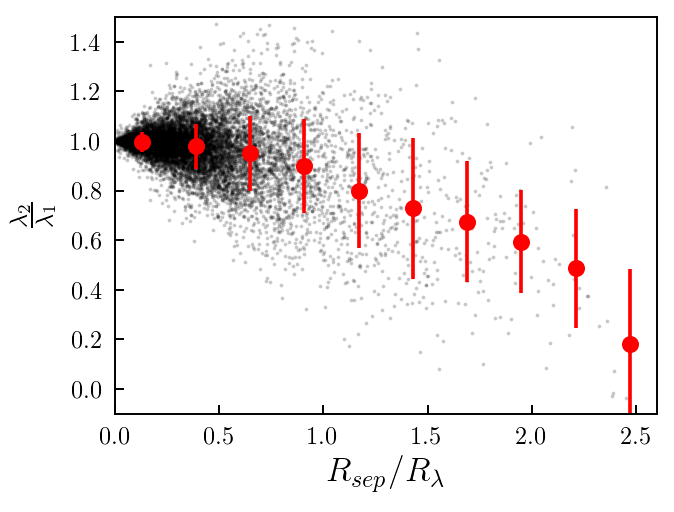

In [15]:
nbins = 10
lmdaratio_range = (-0.1,1.5)
#error for mass
r_range = (0., 2.6)
n, _ = np.histogram(r_ratio, bins=nbins, range=r_range)
sy, _ = np.histogram(r_ratio, bins=nbins, weights=lmda_ratio, range=r_range)
sy2, r_bins = np.histogram(r_ratio, bins=nbins, weights=lmda_ratio**2., range=r_range)
lmdaratio_r_mean = sy / n
lmdaratio_r_std = np.sqrt(sy2/n - lmdaratio_r_mean**2.)

plt.figure(figsize=(4,3))
plt.scatter(r_ratio, lmda_ratio, s=0.3, alpha=0.2, color='black')
plt.errorbar((r_bins[1:] + r_bins[:-1])/2, lmdaratio_r_mean, yerr=lmdaratio_r_std, fmt='ro')
plt.xlim(r_range)
plt.ylim(lmdaratio_range)
plt.ylabel(r'$\frac{\lambda_2}{\lambda_1}$', fontsize=14)
plt.xlabel(r'$R_{sep}/R_{\lambda}$', fontsize=14)

plt.show()

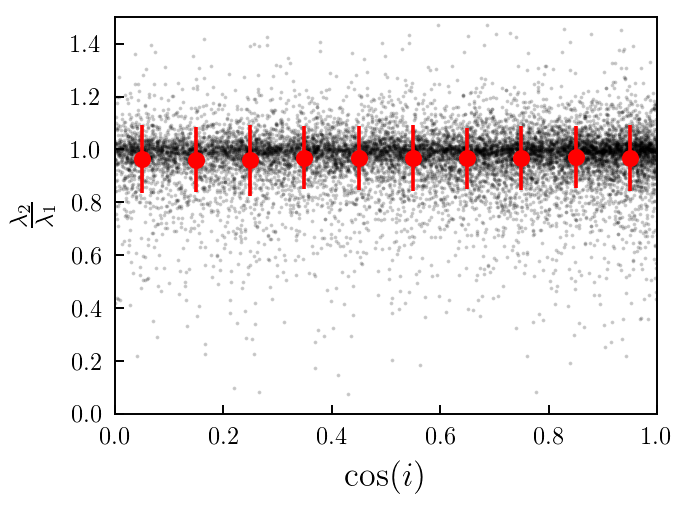

In [16]:
from scipy.stats import binned_statistic as bin_stat

nbins = 10
lmdaratio_range = (0.,1.5)

#error for deltalambda vs miscentering distance
cosi_range = (0.0,1)
n, _ = np.histogram(redM_matched.cosi, bins=nbins, range=cosi_range)
sy, _ = np.histogram(redM_matched.cosi, bins=nbins, weights=lmda_ratio, range=cosi_range)
sy2, cosi_bins = np.histogram(redM_matched.cosi, bins=nbins, weights=lmda_ratio**2., range=cosi_range)
lmda_cosi_mean = sy / n
lmda_cosi_std = np.sqrt(sy2/n - lmda_cosi_mean**2.)

fig, ax = plt.subplots(1,1, figsize = (4,3))
#plt.tight_layout()
#Scatter plots
ax.scatter(redM_matched.cosi, lmda_ratio, s=0.3, alpha=0.2, color='black')
ax.errorbar((cosi_bins[1:] + cosi_bins[:-1])/2, lmda_cosi_mean, yerr=lmda_cosi_std, fmt='ro')
ax.set_xlim(cosi_range)
ax.set_ylim(lmdaratio_range)

plt.ylabel(r'$\frac{\lambda_2}{\lambda_1}$', fontsize=14)
plt.xlabel(r'$\cos(i)$', fontsize=14)

plt.show()